Name : Ilham Muhamad Firdaus    
Student ID : 1103202001

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [2]:
dataset = "Minute_Weather.csv"
df = pd.read_csv(dataset)
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [3]:
sampled_df = df[(df['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [4]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [5]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [6]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [7]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [8]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [9]:
rows_before - rows_after

46

In [10]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [11]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed','relative_humidity']

In [12]:
select_df = sampled_df[features]
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [13]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [14]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [15]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

c:\Users\ilham\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


model
 KMeans(n_clusters=12)


In [16]:
centers = model.cluster_centers_
centers

array([[ 0.72399689,  0.44709739,  0.28719881, -0.533523  ,  0.47435298,
        -0.53982029, -0.77155813],
       [-0.69812161,  0.53811139,  0.17588978, -0.58577742,  0.34556232,
        -0.59917247, -0.11136809],
       [-0.16471356,  0.86418261, -1.31102847, -0.58968732, -1.1667337 ,
        -0.60495333, -0.64068061],
       [ 0.23406885,  0.32036132,  1.88795276, -0.65187638, -1.55167305,
        -0.57671307, -0.28354803],
       [ 0.26586123, -0.99392982,  0.66316411, -0.54613641,  0.854429  ,
        -0.52840558,  1.1538359 ],
       [-0.84330005, -1.19836671,  0.37510662,  0.34124341,  0.47368376,
         0.32919522,  1.36459128],
       [-0.21273409,  0.62988373,  0.40838895,  0.73514131,  0.51649982,
         0.6731607 , -0.14921004],
       [ 1.19070339, -0.25445169, -1.15488277,  2.12034018, -1.05328454,
         2.23705646, -1.13474293],
       [ 1.36614169, -0.0807806 , -1.20705835, -0.05363748, -1.07571793,
        -0.03356753, -0.9772813 ],
       [-1.17639495, -0.8786

In [17]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	Z = [np.append(A, index) for index, A in enumerate(centers)]

	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [18]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [19]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.723997,0.447097,0.287199,-0.533523,0.474353,-0.539820,-0.771558,0
1,-0.698122,0.538111,0.175890,-0.585777,0.345562,-0.599172,-0.111368,1
2,-0.164714,0.864183,-1.311028,-0.589687,-1.166734,-0.604953,-0.640681,2
3,0.234069,0.320361,1.887953,-0.651876,-1.551673,-0.576713,-0.283548,3
4,0.265861,-0.993930,0.663164,-0.546136,0.854429,-0.528406,1.153836,4
5,-0.843300,-1.198367,0.375107,0.341243,0.473684,0.329195,1.364591,5
6,-0.212734,0.629884,0.408389,0.735141,0.516500,0.673161,-0.149210,6
7,1.190703,-0.254452,-1.154883,2.120340,-1.053285,2.237056,-1.134743,7
8,1.366142,-0.080781,-1.207058,-0.053637,-1.075718,-0.033568,-0.977281,8
9,-1.176395,-0.878685,0.446048,1.971802,0.538129,1.933238,0.917423,9


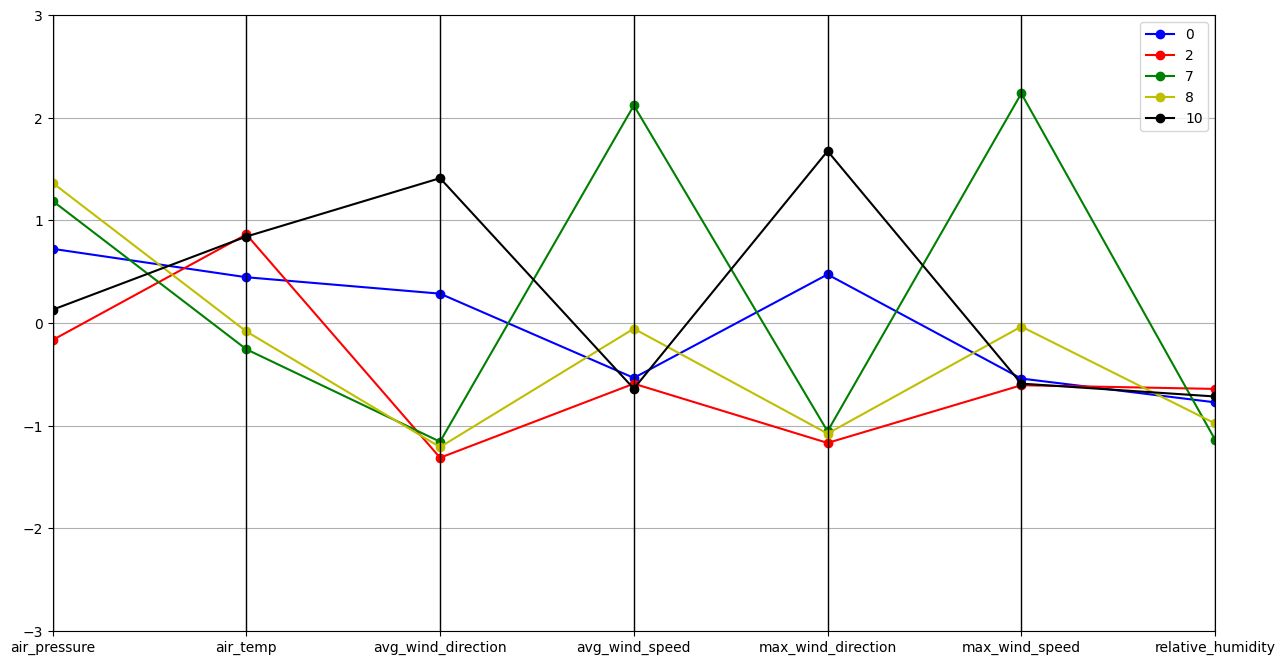

In [20]:
# Dry Days
parallel_plot(P[P['relative_humidity'] < -0.5])

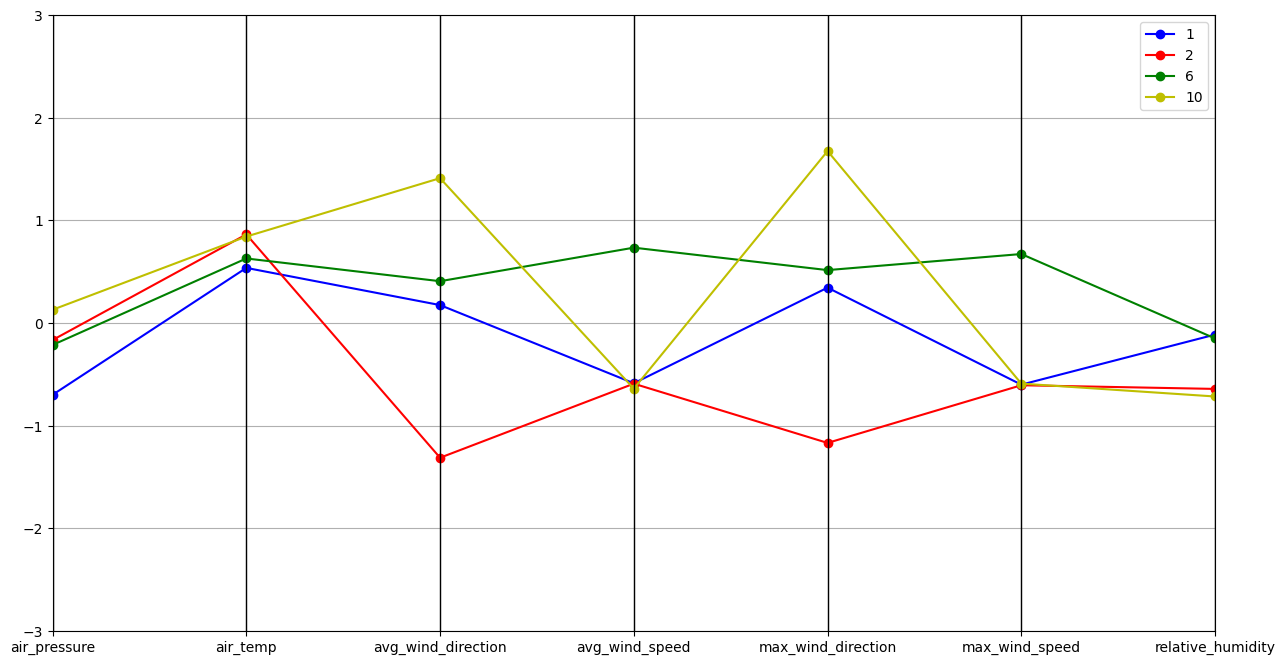

In [21]:
# Warm Days
parallel_plot(P[P['air_temp'] > 0.5])

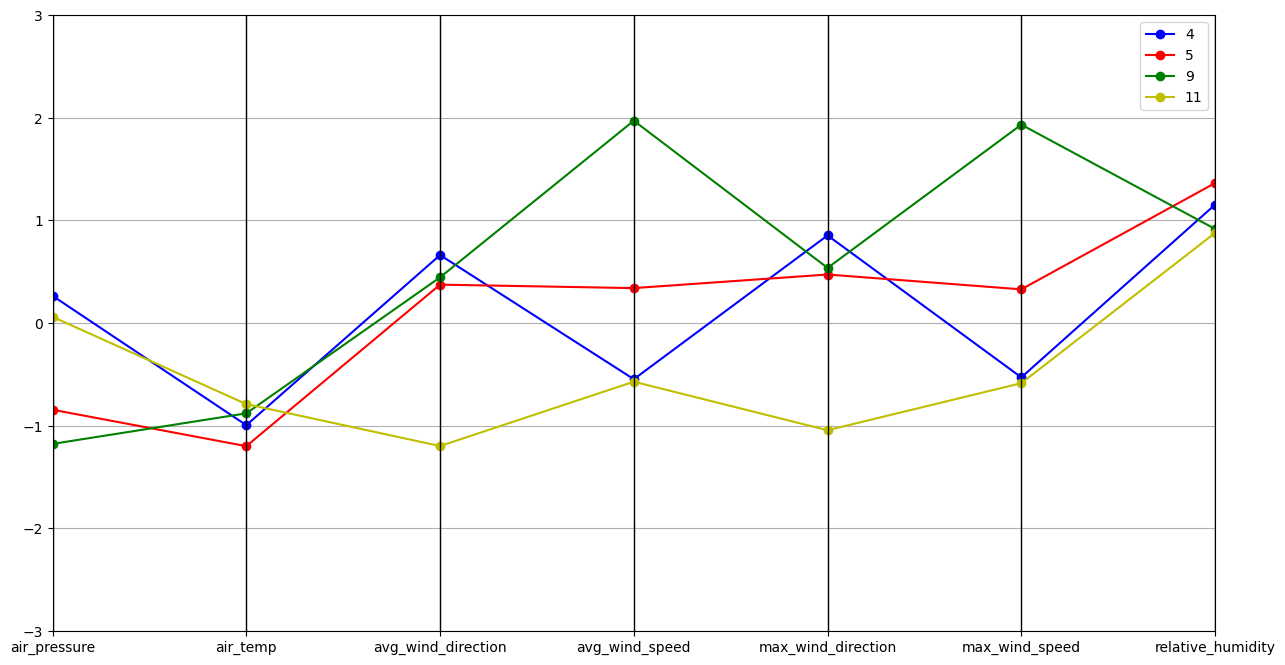

In [22]:
# Cool Days
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])